##### Name: Huiqi Wang
##### Github Username: wang2bbq
##### USC ID: 6613859213

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Transfer Learning for Image Classification

## a.b. Data Exploration and Pre-processing

### i. Encode your classes using one-hot encoding and Classes.xlsx

In [2]:
import re
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import os
import shutil
import math
from sklearn.model_selection import train_test_split

In [3]:
def separate_classes(f, root):
    if re.search("^Crested", f):
    	  cv2.imwrite(root+'class_0/'+'0_'+f, resized)
    elif re.search("^Bobolink",f):
    	  cv2.imwrite(root+'class_1/'+'1_'+f, resized)
    elif re.search("^Lazuli", f):
        cv2.imwrite(root+'class_2/'+'2_'+f, resized)
    elif re.search("^Brandt", f):
        cv2.imwrite(root+'class_3/'+'3_'+f, resized)
    elif re.search("^Olive", f):
        cv2.imwrite(root+'class_4/'+'4_'+f, resized)
    elif re.search("^Scissor", f):
        cv2.imwrite(root+'class_5/'+'5_'+f, resized)
    elif re.search("^Anna", f):
        cv2.imwrite(root+'class_6/'+'6_'+f, resized)
    elif re.search("^Pomarine", f):
        cv2.imwrite(root+'class_7/'+'7_'+f, resized)
    elif re.search("^Dark", f):
        cv2.imwrite(root+'class_8/'+'8_'+f, resized)
    elif re.search("^Pied", f):
        cv2.imwrite(root+'class_9/'+'9_'+f, resized)
    elif re.search("^Ringed", f):
        cv2.imwrite(root+'class_10/'+'10_'+f, resized)
    elif re.search("^Pacific", f):
        cv2.imwrite(root+'class_11/'+'11_'+f, resized)
    elif re.search("^Ovenbird", f):
        cv2.imwrite(root+'class_12/'+'12_'+f, resized)
    elif re.search("^American", f):
        cv2.imwrite(root+'class_13/'+'13_'+f, resized)
    elif re.search("^Savannah", f):
        cv2.imwrite(root+'class_14/'+'14_'+f, resized)
    elif re.search("^Bank", f):
        cv2.imwrite(root+'class_15/'+'15_'+f, resized)
    elif re.search("^Artic", f):
        cv2.imwrite(root+'class_16/'+'16_'+f, resized)
    elif re.search("^Brown", f):
        cv2.imwrite(root+'class_17/'+'17_'+f, resized)
    elif re.search("^White", f):
        cv2.imwrite(root+'class_18/'+'18_'+f, resized)
    elif re.search("^Kentucky", f):
        cv2.imwrite(root+'class_19/'+'19_'+f, resized)

### ii. Randomly select training set, validation set, test set

In [4]:

#path = '../data/images'
path = '/content/gdrive/MyDrive/data/images'
folders = os.listdir(path)
for i in range(len(folders)):
    if folders[i] != '.DS_Store':
        #folder_path = '../data/images/' + folders[i]
        folder_path = '/content/gdrive/MyDrive/data/images/' + folders[i]
        file_list_per_folder = os.listdir(folder_path)
        n = len(file_list_per_folder)
        n_train = math.ceil(0.7*n)
        n_vali = math.ceil(0.15*n)
        n_test = n - n_train - n_vali
        train_set, remain_set = train_test_split(file_list_per_folder, train_size=n_train, random_state=1)
        vali_set, test_set = train_test_split(remain_set, train_size=n_vali, random_state=1)
        for file in train_set:
            old_path = folder_path + '/' + file
            #new_path_train = '../data/training/'+file
            new_path_train = '/content/gdrive/MyDrive/data/training/'+file
            # Copy src to dst. (cp src dst)
            shutil.copy(old_path, new_path_train)
        for file in vali_set:
            old_path = folder_path + '/' + file
            #new_path_vali = '../data/validation/'+file
            new_path_vali = '/content/gdrive/MyDrive/data/validation/'+file
            shutil.copy(old_path, new_path_vali)
        for file in test_set:
            old_path = folder_path + '/' + file
            #new_path_test = '../data/test/'+file
            new_path_test = '/content/gdrive/MyDrive/data/test/'+file
            shutil.copy(old_path, new_path_test)


### iii. Zero-pad or resize the images in your dataset

In [5]:
# OpenCV
#old_path1 = '../data/training'
old_path1 = '/content/gdrive/MyDrive/data/training'
#old_path2 = '../data/validation'
old_path2 = '/content/gdrive/MyDrive/data/validation'
#old_path3 = '../data/test'
old_path3 = '/content/gdrive/MyDrive/data/test'
files1 = os.listdir(old_path1)
files2 = os.listdir(old_path2)
files3 = os.listdir(old_path3)
width = 224
height = 224
dim = (width, height)
for file in files1:
    img = cv2.imread(old_path1+'/'+file)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    #resized_path = '../data/training_resize/'+file
    resized_path = '/content/gdrive/MyDrive/data/training_resize/'
    separate_classes(file, resized_path)
for file in files2:
    img = cv2.imread(old_path2+'/'+file)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    #resized_path = '../data/validation_resize/'+file
    resized_path = '/content/gdrive/MyDrive/data/validation_resize/'
    separate_classes(file, resized_path)
for file in files3:
    img = cv2.imread(old_path3+'/'+file)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    #resized_path = '../data/test_resize/'+file
    resized_path = '/content/gdrive/MyDrive/data/test_resize/'
    separate_classes(file, resized_path)

## c. Transfer Learning

### i. ii. To perform empirical regularization, crop, randomly zoo, rotate, flip, contrast, and translate images in your training set for image augmentation. You can use various tools to do this, including OpenCV

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/training_resize',
                            labels='inferred',
                            label_mode='categorical',
                            image_size=(224,224),
                            seed=1337,
                            shuffle=True,
                            batch_size=5 # update!
)
validation_ds = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/validation_resize',
                            labels='inferred',
                            label_mode='categorical',
                            image_size=(224,224),
                            seed=1337,
                            shuffle=False,
                            batch_size=5 #update!
)
test_ds = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/test_resize',
                            labels='inferred',
                            label_mode='categorical',
                            image_size=(224,224),
                            seed=1337,
                            shuffle=False,
                            batch_size=5 #update!
)

Found 1067 files belonging to 20 classes.
Found 324 files belonging to 20 classes.
Found 318 files belonging to 20 classes.


In [40]:
data_augmentation = tf.keras.Sequential([
    layers.RandomCrop(224,224),
    layers.RandomZoom(0.1, 0.1),
    layers.RandomRotation(0.1),
    layers.RandomFlip(mode="horizontal"),
    layers.RandomContrast(0.1),
    layers.RandomTranslation((-0.1, 0.1),(-0.1, 0.1)),
])
tf.get_logger().setLevel('ERROR')
# Apply 'data_augmentation' to the training images
train_ds = train_ds.map(
	lambda img, label: (data_augmentation(img), label),
	num_parallel_calls=tf.data.AUTOTUNE,
	)


In [41]:
# Prefetching samples in GPU memory helps maximize GPU utilization
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.prefetch(tf.data.AUTOTUNE)

### iii. Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable

In [42]:
# Instantiate a base model(EfficientNetB0) with pre-trained weights
base_model_efficientnetb0 = keras.applications.efficientnet.EfficientNetB0(
    include_top=False, # Do not include the ImageNet classifier at the top
    weights='imagenet', # Load weights pre-trained on ImageNet
    input_shape=(224, 224, 3)
)
# Freeze the base model
base_model_efficientnetb0.trainable = False
# Create new model on top
inputs1 = keras.Input(shape=(224, 224, 3))
#x = layers.Rescaling(1./255)(inputs) # delete!
x1 = base_model_efficientnetb0(inputs1, training=False)
x1 = keras.layers.GlobalAveragePooling2D()(x1)
x1 = layers.BatchNormalization()(x1) # before relu
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(20, activation='relu')(x1)
outputs1 = tf.keras.layers.Softmax()(x1)
model1 = keras.Model(inputs1, outputs1)
model1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_11  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_11 (Bat  (None, 1280)             5120      
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 20)                256

In [23]:
# Instantiate a base model(VGG16) with pre-trained weights
base_model_vgg16 = tf.keras.applications.VGG16(
	include_top = False,
	weights = 'imagenet',
	input_shape = (224,224,3),
	)
# Freeze the base model
base_model_vgg16.trainable = False
# Create new model on top
inputs2 = keras.Input(shape=(224, 224, 3))
x2 = tf.keras.applications.vgg16.preprocess_input(inputs2)
x2 = base_model_vgg16(x2, training=False)
x2 = keras.layers.GlobalAveragePooling2D()(x2)
x2 = layers.BatchNormalization()(x2) # before relu
x2 = layers.Dropout(0.2)(x2)
x2 = layers.Dense(20, activation='relu')(x2)
outputs2 = tf.keras.layers.Softmax()(x2)
model2 = keras.Model(inputs2, outputs2)
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_4   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_4 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_6   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                           

### iv. Train the networks (EfficientNetB0 and VGG16) for at least 50 epochs(preferably 100 epochs) and perform early stopping using the validation set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs

In [43]:
# Train the top layer (EfficientNetB0)
opt1 = keras.optimizers.Adam(learning_rate=0.004) #update!
model1.compile(optimizer=opt1,
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
early_stop1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=10, 
                                               restore_best_weights=True #restore model weights from the epoch with the best value of the monitored quantity
)

history_efficientnetb0 = model1.fit(train_ds,
                              batch_size=5,
                              epochs=100,
                              validation_data=validation_ds,
                              validation_freq=1,
                              callbacks=[early_stop1]
                              )

Epoch 1/100
214/214 [==============================] - 11s 25ms/step - loss: 2.4622 - categorical_accuracy: 0.6214 - val_loss: 2.2860 - val_categorical_accuracy: 0.8086
Epoch 2/100
214/214 [==============================] - 4s 19ms/step - loss: 2.3072 - categorical_accuracy: 0.7741 - val_loss: 2.2483 - val_categorical_accuracy: 0.8333
Epoch 3/100
214/214 [==============================] - 4s 18ms/step - loss: 2.2667 - categorical_accuracy: 0.8163 - val_loss: 2.2363 - val_categorical_accuracy: 0.8426
Epoch 4/100
214/214 [==============================] - 4s 18ms/step - loss: 2.2614 - categorical_accuracy: 0.8172 - val_loss: 2.2287 - val_categorical_accuracy: 0.8457
Epoch 5/100
214/214 [==============================] - 4s 18ms/step - loss: 2.2434 - categorical_accuracy: 0.8332 - val_loss: 2.2078 - val_categorical_accuracy: 0.8704
Epoch 6/100
214/214 [==============================] - 4s 19ms/step - loss: 2.2342 - categorical_accuracy: 0.8463 - val_loss: 2.1959 - val_categorical_accuracy

In [24]:
# Train the top layer (VGG16)
opt2 = keras.optimizers.Adam(learning_rate=0.005)
model2.compile(optimizer=opt2,
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
early_stop2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=10, 
                                               restore_best_weights=True
                                               )
history_vgg16 = model2.fit(train_ds,
                              batch_size=5,
                              epochs=100,
                              validation_data=validation_ds,
                              validation_freq=1,
                              callbacks=[early_stop2]
                              )

Epoch 1/100
214/214 [==============================] - 3s 11ms/step - loss: 2.6838 - categorical_accuracy: 0.4171 - val_loss: 2.3514 - val_categorical_accuracy: 0.7407
Epoch 2/100
214/214 [==============================] - 2s 10ms/step - loss: 2.4094 - categorical_accuracy: 0.6870 - val_loss: 2.2729 - val_categorical_accuracy: 0.8117
Epoch 3/100
214/214 [==============================] - 2s 10ms/step - loss: 2.3380 - categorical_accuracy: 0.7488 - val_loss: 2.2420 - val_categorical_accuracy: 0.8457
Epoch 4/100
214/214 [==============================] - 2s 10ms/step - loss: 2.3052 - categorical_accuracy: 0.7816 - val_loss: 2.2299 - val_categorical_accuracy: 0.8580
Epoch 5/100
214/214 [==============================] - 2s 10ms/step - loss: 2.2585 - categorical_accuracy: 0.8266 - val_loss: 2.2036 - val_categorical_accuracy: 0.8735
Epoch 6/100
214/214 [==============================] - 2s 10ms/step - loss: 2.2654 - categorical_accuracy: 0.8201 - val_loss: 2.2052 - val_categorical_accuracy:

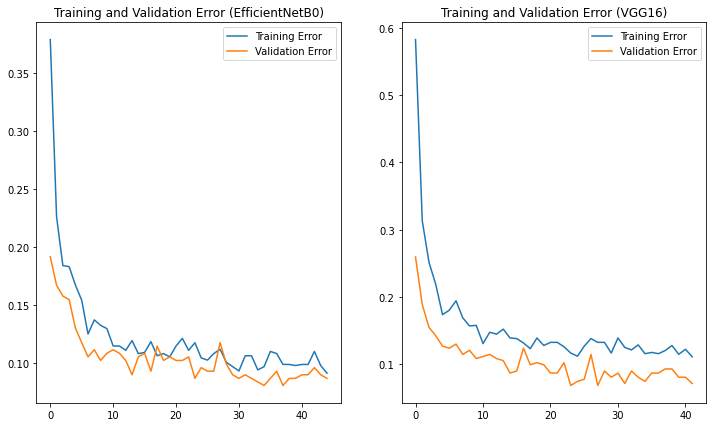

In [44]:
# Plot the training and validation errors vs epochs
acc_efficientnetb0 = history_efficientnetb0.history['categorical_accuracy']
val_acc_efficientnetb0 = history_efficientnetb0.history['val_categorical_accuracy']
error_efficientnetb0 = []
val_error_efficientnetb0 = []
for i in range(len(acc_efficientnetb0)):
	error_efficientnetb0.append(1 - acc_efficientnetb0[i])
for i in range(len(val_acc_efficientnetb0)):
	val_error_efficientnetb0.append(1 - val_acc_efficientnetb0[i])
epochs_efficientnetb0 = len(history_efficientnetb0.history['categorical_accuracy'])
epochs_range1 = range(epochs_efficientnetb0)

acc_vgg16 = history_vgg16.history['categorical_accuracy']
val_acc_vgg16 = history_vgg16.history['val_categorical_accuracy']
error_vgg16 = []
val_error_vgg16 = []
for i in range(len(acc_vgg16)):
	error_vgg16.append(1 - acc_vgg16[i])
for i in range(len(val_acc_vgg16)):
	val_error_vgg16.append(1 - val_acc_vgg16[i])
epochs_vgg16 = len(history_vgg16.history['categorical_accuracy'])
epochs_range2 = range(epochs_vgg16)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, error_efficientnetb0, label='Training Error')
plt.plot(epochs_range1, val_error_efficientnetb0, label='Validation Error')
plt.legend(loc='upper right')
plt.title('Training and Validation Error (EfficientNetB0)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range2, error_vgg16, label='Training Error')
plt.plot(epochs_range2, val_error_vgg16, label='Validation Error')
plt.legend(loc='upper right')
plt.title('Training and Validation Error (VGG16)')
plt.show()

### v. Report Precision, Recall, and F1 score for your model. Remember that this is a multi-class classification problem

In [45]:
# EfficientNetB0
# Test
pred_efficientnetb0 = model1.predict(test_ds)
pred_label_efficientnetb0 = tf.keras.utils.to_categorical(np.argmax(pred_efficientnetb0, axis=1))
# Get true label
true_label_efficientnetb0 = np.concatenate([y for x, y in test_ds], axis=0)
# Classification report
print(classification_report(true_label_efficientnetb0, pred_label_efficientnetb0))

64/64 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        18
           4       0.61      0.94      0.74        18
           5       0.94      1.00      0.97        17
           6       0.88      1.00      0.94        15
           7       0.81      0.87      0.84        15
           8       1.00      1.00      1.00        16
           9       0.00      0.00      0.00        14
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        15
          13       0.88      1.00      0.94        15
          14       1.00      0.75      0.86        16
          15       0.95      1.00      0.97        18
          16       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# VGG16
# Test
pred_vgg16 = model2.predict(test_ds)
pred_label_vgg16 = tf.keras.utils.to_categorical(np.argmax(pred_vgg16, axis=1))
# Get true label
true_label_vgg16 = np.concatenate([y for x, y in test_ds], axis=0)
# Classification report
print(classification_report(true_label_vgg16, pred_label_vgg16))

64/64 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.87      0.87      0.87        15
           2       1.00      1.00      1.00        18
           3       0.90      1.00      0.95        18
           4       0.84      0.89      0.86        18
           5       0.94      0.88      0.91        17
           6       0.93      0.93      0.93        15
           7       0.92      0.80      0.86        15
           8       1.00      1.00      1.00        16
           9       0.81      0.93      0.87        14
          10       0.95      1.00      0.97        18
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        15
          13       1.00      0.93      0.97        15
          14       1.00      0.81      0.90        16
          15       0.95      1.00      0.97        18
          16       1.00    